# Load Data

In [33]:
import pandas as pd
import numpy as np

In [34]:
df = pd.read_csv('df.zip')

In [35]:
df

,yU_1,yU_2,yU_3,yU_4,yU_5,yU_6,yU_7,yU_8,yU_9,yU_10,...,yL_12,yL_13,yL_14,yL_15,ReynoldsNumber,MachNumber,alpha,Cl,Cd,Cm
0,0.006923,0.013103,0.018233,0.022013,0.024229,0.024823,0.023923,0.021796,0.018781,0.015248,...,-0.007926,-0.004725,-0.002193,-0.000563,100000,0.1,-10,-0.334,0.16140,0.001
1,0.006923,0.013103,0.018233,0.022013,0.024229,0.024823,0.023923,0.021796,0.018781,0.015248,...,-0.007926,-0.004725,-0.002193,-0.000563,100000,0.1,-9,-0.392,0.13236,0.001
2,0.006923,0.013103,0.018233,0.022013,0.024229,0.024823,0.023923,0.021796,0.018781,0.015248,...,-0.007926,-0.004725,-0.002193,-0.000563,100000,0.1,-8,-0.442,0.10163,0.001
3,0.006923,0.013103,0.018233,0.022013,0.024229,0.024823,0.023923,0.021796,0.018781,0.015248,...,-0.007926,-0.004725,-0.002193,-0.000563,100000,0.1,-7,-0.469,0.07583,0.001
4,0.006923,0.013103,0.018233,0.022013,0.024229,0.024823,0.023923,0.021796,0.018781,0.015248,...,-0.007926,-0.004725,-0.002193,-0.000563,100000,0.1,-6,-0.459,0.05855,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253189,0.004474,0.005027,0.001877,-0.003540,-0.009635,-0.014932,-0.018353,-0.019393,-0.018142,-0.015217,...,-0.023546,-0.013828,-0.006325,-0.001614,500000,0.3,6,0.103,0.06955,0.031
253190,0.004474,0.005027,0.001877,-0.003540,-0.009635,-0.014932,-0.018353,-0.019393,-0.018142,-0.015217,...,-0.023546,-0.013828,-0.006325,-0.001614,500000,0.3,7,0.033,0.05742,0.033
253191,0.004474,0.005027,0.001877,-0.003540,-0.009635,-0.014932,-0.018353,-0.019393,-0.018142,-0.015217,...,-0.023546,-0.013828,-0.006325,-0.001614,500000,0.3,8,0.044,0.06682,0.034
253192,0.004474,0.005027,0.001877,-0.003540,-0.009635,-0.014932,-0.018353,-0.019393,-0.018142,-0.015217,...,-0.023546,-0.013828,-0.006325,-0.001614,500000,0.3,9,0.055,0.08164,0.035


In [36]:
from tqdm import tqdm

def assign_airfoil_ids(df):
    '''
    Takes in a dataframe and returns the dataframe with airfoil ids
    '''
    # Extract y-coordinate columns
    y_columns = df.columns[df.columns.str.startswith('y')]

    # Create a new column with a unique identifier for each airfoil
    df['Airfoil_No'] = pd.factorize(df[y_columns].apply(tuple, axis=1))[0] # using the factorize function from pandas to convert the tuples into integer IDs.

    df = pd.concat([df[['Airfoil_No']], df.drop(columns=['Airfoil_No'])], axis=1)
    
    # Count the number of unique airfoils
    num_airfoils = df['Airfoil_No'].nunique()

    print(f"Number of airfoils: {num_airfoils}")

    return df

In [37]:
df = assign_airfoil_ids(df)
df

Number of airfoils: 831


,Airfoil_No,yU_1,yU_2,yU_3,yU_4,yU_5,yU_6,yU_7,yU_8,yU_9,...,yL_12,yL_13,yL_14,yL_15,ReynoldsNumber,MachNumber,alpha,Cl,Cd,Cm
0,0,0.006923,0.013103,0.018233,0.022013,0.024229,0.024823,0.023923,0.021796,0.018781,...,-0.007926,-0.004725,-0.002193,-0.000563,100000,0.1,-10,-0.334,0.16140,0.001
1,0,0.006923,0.013103,0.018233,0.022013,0.024229,0.024823,0.023923,0.021796,0.018781,...,-0.007926,-0.004725,-0.002193,-0.000563,100000,0.1,-9,-0.392,0.13236,0.001
2,0,0.006923,0.013103,0.018233,0.022013,0.024229,0.024823,0.023923,0.021796,0.018781,...,-0.007926,-0.004725,-0.002193,-0.000563,100000,0.1,-8,-0.442,0.10163,0.001
3,0,0.006923,0.013103,0.018233,0.022013,0.024229,0.024823,0.023923,0.021796,0.018781,...,-0.007926,-0.004725,-0.002193,-0.000563,100000,0.1,-7,-0.469,0.07583,0.001
4,0,0.006923,0.013103,0.018233,0.022013,0.024229,0.024823,0.023923,0.021796,0.018781,...,-0.007926,-0.004725,-0.002193,-0.000563,100000,0.1,-6,-0.459,0.05855,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253189,830,0.004474,0.005027,0.001877,-0.003540,-0.009635,-0.014932,-0.018353,-0.019393,-0.018142,...,-0.023546,-0.013828,-0.006325,-0.001614,500000,0.3,6,0.103,0.06955,0.031
253190,830,0.004474,0.005027,0.001877,-0.003540,-0.009635,-0.014932,-0.018353,-0.019393,-0.018142,...,-0.023546,-0.013828,-0.006325,-0.001614,500000,0.3,7,0.033,0.05742,0.033
253191,830,0.004474,0.005027,0.001877,-0.003540,-0.009635,-0.014932,-0.018353,-0.019393,-0.018142,...,-0.023546,-0.013828,-0.006325,-0.001614,500000,0.3,8,0.044,0.06682,0.034
253192,830,0.004474,0.005027,0.001877,-0.003540,-0.009635,-0.014932,-0.018353,-0.019393,-0.018142,...,-0.023546,-0.013828,-0.006325,-0.001614,500000,0.3,9,0.055,0.08164,0.035


In [38]:
df['Airfoil_No'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

## RandomSearchCV

In [120]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import numpy as np

In [121]:
# Get the unique airfoil numbers
unique_airfoil_numbers = df['Airfoil_No'].unique()

In [127]:
train_airfoils, test_airfoils, _, _ = train_test_split(unique_airfoil_numbers, unique_airfoil_numbers, test_size=0.1, random_state=42)

In [128]:
train_df = get_rows_for_airfoils(train_airfoils)
test_df = get_rows_for_airfoils(test_airfoils)

In [129]:
# Perform Min-Max scaling on the features separately for each fold
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_df.drop(['Airfoil_No', 'Cl', 'Cd', 'Cm'], axis=1).values)
y_train = train_df[['Cl', 'Cd', 'Cm']].values
X_test = scaler.transform(test_df.drop(['Airfoil_No', 'Cl', 'Cd', 'Cm'], axis=1).values)
y_test = test_df[['Cl', 'Cd', 'Cm']].values

In [144]:
# Create a KerasRegressor wrapper for use with RandomizedSearchCV
regressor = KerasRegressor(build_fn=create_model, epochs=20, batch_size=128, verbose=0)

# Define the hyperparameter distributions for tuning
param_dist = {
    'neurons1': [512, 256, 128],  # Neurons with order-of-2 range
    'neurons2': [256, 128, 64],  # Neurons with order-of-2 range
    'neurons3': [64, 32, 16],  # Neurons with order-of-2 range
    'neurons4': [32, 16, 8],  # Neurons with order-of-2 range
}

# Create the RandomizedSearchCV object with a maximum of 20 parameter combinations
random_search = RandomizedSearchCV(estimator=regressor, param_distributions=param_dist, scoring='neg_mean_squared_error', n_iter=20, cv=5)

C:\Users\Lasal Jayawardena\AppData\Local\Temp\ipykernel_15648\182243599.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor = KerasRegressor(build_fn=create_model, epochs=20, batch_size=128, verbose=0)


In [145]:
# Perform hyperparameter tuning with early stopping and evaluation on the test set
random_result = random_search.fit(X_train, y_train, validation_data=(X_test, y_test))

In [146]:
# Get the best model for the current fold
best_model = random_result.best_estimator_.model
best_scaler = scaler

# Save the best model and scaler for the current fold
best_model.save(f'./search_assets/best_model_fold_{fold}.h5')
joblib.dump(best_scaler, f'./search_assets/best_min_max_scaler_fold_{fold}.pkl')

# Evaluate the best model on the test data for the current fold
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse}")

812/812 [==============================] - 1s 1ms/step
Test RMSE: 0.018075607436702727


In [147]:
# random_result.cv_results_
random_result.best_params_

{'neurons4': 8, 'neurons3': 64, 'neurons2': 256, 'neurons1': 512}

In [148]:
random_result.cv_results_

{'mean_fit_time': array([75.97858825, 71.14025769, 64.90447259, 65.81463943, 68.04780111,
        72.96433668, 69.68225107, 68.33149505, 62.20927987, 63.47398815,
        66.76915426, 67.04433661, 64.97910404, 69.35469065, 71.39298973,
        66.07277493, 63.45933309, 66.68185115, 66.01372724, 64.54137521]),
 'std_fit_time': array([3.43950954, 3.43002975, 0.90212553, 1.22272113, 2.47892632,
        0.62948257, 1.0289225 , 1.70756711, 0.95669067, 0.84773743,
        2.1981148 , 0.68241706, 1.05659811, 4.7597037 , 2.71317689,
        1.74066708, 0.25026036, 2.48444038, 1.26591066, 0.7706904 ]),
 'mean_score_time': array([0.6275744 , 0.55690775, 0.55606308, 0.5622128 , 0.63836412,
        0.66432729, 0.58277574, 0.58794823, 0.53557243, 0.54319835,
        0.56676154, 0.54236388, 0.54494276, 0.58273721, 0.58283663,
        0.53511467, 0.54410267, 0.5302856 , 0.53489561, 0.52087221]),
 'std_score_time': array([0.05393743, 0.02199572, 0.03624535, 0.03648619, 0.06004387,
        0.05263532, 

## KFOLD and RandomSearchCV

In [177]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import joblib

In [48]:
from tqdm import tqdm

In [151]:
# Create empty lists to store model, scaler, and history objects for each fold
models = []
scalers = []
histories = []

# Define a function to get rows of the DataFrame for a given array of airfoil numbers
def get_rows_for_airfoils(airfoil_numbers):
    return df[df['Airfoil_No'].isin(airfoil_numbers)]

In [152]:
# Define a function to create the Keras model with hyperparameters
def create_model(neurons1=512, neurons2=256, neurons3=64, neurons4=8):
    model = Sequential()
    model.add(Dense(neurons1, activation='relu'))
    model.add(Dense(neurons2, activation='relu'))
    model.add(Dense(neurons3, activation='relu'))
    model.add(Dense(neurons4, activation='relu'))
    model.add(Dense(3))
    model.compile(optimizer='adam', loss='mse')
    return model

In [153]:
# # Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [156]:
for fold, (train_indices, test_indices) in tqdm(enumerate(stratified_kfold.split(unique_airfoil_numbers, unique_airfoil_numbers))):
    print(f"Fold {fold + 1} / {n_splits}")

    # Get the airfoil numbers for training and testing in the current fold
    train_airfoils = unique_airfoil_numbers[train_indices]
    test_airfoils = unique_airfoil_numbers[test_indices]

    # Get the rows of the DataFrame for the selected airfoil numbers
    train_df = get_rows_for_airfoils(train_airfoils)
    test_df = get_rows_for_airfoils(test_airfoils)

    # Perform Min-Max scaling on the features separately for each fold
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(train_df.drop(['Airfoil_No', 'Cl', 'Cd', 'Cm'], axis=1).values)
    y_train = train_df[['Cl', 'Cd', 'Cm']].values
    X_test = scaler.transform(test_df.drop(['Airfoil_No', 'Cl', 'Cd', 'Cm'], axis=1).values)
    y_test = test_df[['Cl', 'Cd', 'Cm']].values

    # Perform hyperparameter tuning with early stopping and evaluation on the test set
    model = create_model()
    history = model.fit(X_train, y_train, batch_size=128, validation_data=(X_test, y_test), epochs=100, callbacks=[early_stopping], verbose=0)

    # Get the best model for the current fold
    best_model = model
    best_scaler = scaler

    # Save the best model and scaler for the current fold
    best_model.save(f'./training_assets/best_model_fold_{fold}.h5')
    joblib.dump(best_scaler, f'./training_assets/best_min_max_scaler_fold_{fold}.pkl')

    # Evaluate the best model on the test data for the current fold
    y_pred = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Fold {fold + 1} Test RMSE: {rmse}")

    # Save the history object for the current fold
    histories.append(history)

0it [00:00, ?it/s]

Fold 1 / 10
812/812 [==============================] - 1s 1ms/step


1it [01:41, 101.15s/it]

Fold 1 Test RMSE: 0.020048656153202282
Fold 2 / 10
797/797 [==============================] - 1s 978us/step


2it [04:36, 144.77s/it]

Fold 2 Test RMSE: 0.012021563744327479
Fold 3 / 10
792/792 [==============================] - 1s 997us/step


3it [06:42, 136.35s/it]

Fold 3 Test RMSE: 0.013969964342428252
Fold 4 / 10
788/788 [==============================] - 1s 999us/step


4it [11:41, 200.54s/it]

Fold 4 Test RMSE: 0.012778653765117318
Fold 5 / 10
786/786 [==============================] - 3s 4ms/step


5it [15:24, 208.38s/it]

Fold 5 Test RMSE: 0.014046142547115436
Fold 6 / 10
786/786 [==============================] - 1s 1ms/step


6it [18:25, 199.27s/it]

Fold 6 Test RMSE: 0.013198569777072405
Fold 7 / 10
785/785 [==============================] - 1s 1ms/step


7it [21:02, 185.33s/it]

Fold 7 Test RMSE: 0.014518572390069132
Fold 8 / 10
791/791 [==============================] - 1s 1ms/step


8it [21:59, 144.62s/it]

Fold 8 Test RMSE: 0.02133214459179447
Fold 9 / 10
792/792 [==============================] - 1s 1ms/step


9it [24:46, 151.66s/it]

Fold 9 Test RMSE: 0.014117105733354165
Fold 10 / 10
788/788 [==============================] - 1s 1ms/step


10it [27:35, 165.56s/it]

Fold 10 Test RMSE: 0.012839338492140997


In [157]:
histories[-1]

# Train Best Model with Best Split with Early Stopping

In [158]:
df.columns

Index(['Airfoil_No', 'yU_1', 'yU_2', 'yU_3', 'yU_4', 'yU_5', 'yU_6', 'yU_7',
       'yU_8', 'yU_9', 'yU_10', 'yU_11', 'yU_12', 'yU_13', 'yU_14', 'yU_15',
       'yL_1', 'yL_2', 'yL_3', 'yL_4', 'yL_5', 'yL_6', 'yL_7', 'yL_8', 'yL_9',
       'yL_10', 'yL_11', 'yL_12', 'yL_13', 'yL_14', 'yL_15', 'ReynoldsNumber',
       'MachNumber', 'alpha', 'Cl', 'Cd', 'Cm'],
      dtype='object')

In [162]:
# Define a function to create the Keras model with hyperparameters
def create_model(neurons1=512, neurons2=256, neurons3=64, neurons4=8):
    model = Sequential()
    model.add(Dense(neurons1, activation='relu'))
    model.add(Dense(neurons2, activation='relu'))
    model.add(Dense(neurons3, activation='relu'))
    model.add(Dense(neurons4, activation='relu'))
    model.add(Dense(3))
    model.compile(optimizer='adam', loss='mse')
    return model

In [163]:
best_model = create_model()

In [173]:
splits = list(stratified_kfold.split(unique_airfoil_numbers, unique_airfoil_numbers)) 

In [174]:
best_split = splits[1]

In [175]:
train_indices, test_indices = best_split

In [178]:
# # Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10,)
# Create a ModelCheckpoint callback to save the best model based on validation loss
checkpoint = ModelCheckpoint('./best_model/best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

In [179]:
# Get the airfoil numbers for training and testing in the current fold
train_airfoils = unique_airfoil_numbers[train_indices]
test_airfoils = unique_airfoil_numbers[test_indices]

# Get the rows of the DataFrame for the selected airfoil numbers
train_df = get_rows_for_airfoils(train_airfoils)
test_df = get_rows_for_airfoils(test_airfoils)

# Perform Min-Max scaling on the features separately for each fold
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_df.drop(['Airfoil_No', 'Cl', 'Cd', 'Cm'], axis=1).values)
y_train = train_df[['Cl', 'Cd', 'Cm']].values
X_test = scaler.transform(test_df.drop(['Airfoil_No', 'Cl', 'Cd', 'Cm'], axis=1).values)
y_test = test_df[['Cl', 'Cd', 'Cm']].values

# Perform hyperparameter tuning with early stopping and evaluation on the test set
model = create_model()
history = model.fit(X_train, y_train, batch_size=128, validation_data=(X_test, y_test), epochs=100, callbacks=[early_stopping, checkpoint])

Epoch 1/100
1773/1779 [============================>.] - ETA: 0s - loss: 0.0094
Epoch 1: val_loss improved from inf to 0.00097, saving model to ./best_model\best_model.h5
1779/1779 [==============================] - 5s 3ms/step - loss: 0.0094 - val_loss: 9.7499e-04
Epoch 2/100
1759/1779 [============================>.] - ETA: 0s - loss: 0.0011
Epoch 2: val_loss improved from 0.00097 to 0.00067, saving model to ./best_model\best_model.h5
1779/1779 [==============================] - 5s 3ms/step - loss: 0.0011 - val_loss: 6.7173e-04
Epoch 3/100
1766/1779 [============================>.] - ETA: 0s - loss: 9.6066e-04
Epoch 3: val_loss improved from 0.00067 to 0.00061, saving model to ./best_model\best_model.h5
1779/1779 [==============================] - 5s 3ms/step - loss: 9.6099e-04 - val_loss: 6.1246e-04
Epoch 4/100
1770/1779 [============================>.] - ETA: 0s - loss: 8.3608e-04
Epoch 4: val_loss improved from 0.00061 to 0.00060, saving model to ./best_model\best_model.h5
1779/17

<Axes: >

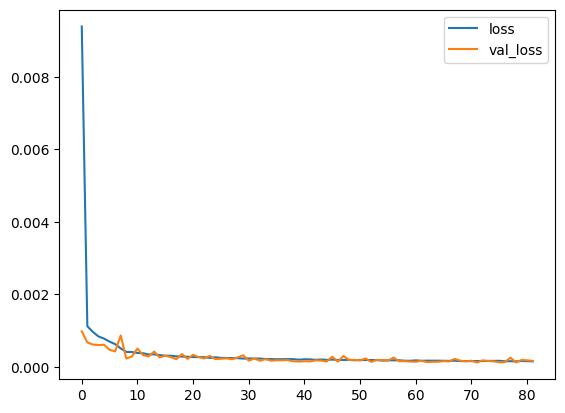

In [186]:
model_loss = pd.DataFrame(history.history)
model_loss.plot()

## Save Assets for Inference

In [180]:
from tensorflow.keras.models import load_model

In [181]:
best_model = load_model("./best_model/best_model.h5")

In [182]:
best_model.save("./best_model/best_model15.h5")

In [187]:
joblib.dump(scaler, f'./best_model/best_scaler15.pkl')

['./best_model/best_scaler15.pkl']

In [188]:
import pickle

In [189]:
with open("./best_model/best_scaler15.obj", "wb") as f:
    pickle.dump(scaler, f)

In [184]:
# Evaluate the best model on the test data for the current fold
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Fold {fold + 1} Test RMSE: {rmse}")

797/797 [==============================] - 1s 1ms/step
Fold 10 Test RMSE: 0.01083408321326283


In [193]:
scaler.transform([X_train[0]])

array([[ 0.09519115,  0.25679642,  0.40343972,  0.50353152,  0.58671592,
         0.67367211,  0.78347873,  0.92928667,  1.04266267,  1.08926999,
         1.16278657,  1.24671786,  1.30415592,  1.89563547,  3.39994896,
        11.0376358 ,  3.73687788,  3.29494602,  2.82269028,  2.51712663,
         2.56750463,  2.85078022,  3.27094726,  3.41168626,  3.38808915,
         3.29088464,  3.67159915,  5.06098318,  9.52640974, 35.07957198,
        -0.25      , -0.5       ,  0.5       ]])